# Data Visualization
Visualize the lidar, joystick, and 10m goal data

In [1]:
from dataset import CLIPDataModule, CLIPSet
from termcolor import cprint
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import utils
import cv2
%matplotlib inline

/home/abhinavc/.local/lib/python3.6/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Create CLIPDataModule

In [2]:
dm = CLIPDataModule(data_path='../data/',
                    batch_size=32,
                    num_workers=10,
                    joy_len=300,
                    include_lidar_file_names=True,
                    verbose=True)

dm.setup()

loading data from ../data/...
skip first 50 frames
batch size: 32
future joystick length: 300

creating training set...


100%|██████████| 19/19 [01:09<00:00,  3.67s/it]


creating validation set...


100%|██████████| 14/14 [00:04<00:00,  3.38it/s]

training size: 68236 samples
validation size: 13443 samples


In [3]:
cprint(f"number of samples: {len(dm.training_set) + len(dm.validation_set)}",
       'green',
       attrs=['bold'])

number of samples: 81679


## Test Training DataLoader
Check if all batches can be retrieved successfully

### Shape Information:
```lidar_stack.shape``` = (batch size, channels, img height, img width) \
```joystick.shape``` = (batch size, joy_len, 3) \
```goal.shape``` = (batch size, 2)


In [4]:
# turn train_dataloader into iterable
trainloader = dm.train_dataloader()
train_iter = iter(trainloader)
print(f'number of batches: {len(trainloader)}')

number of batches: 2132


In [5]:
# %%time
# for i, batch in enumerate(trainloader):
#     lidar, joystick, goal = batch
#     lidar_stack = lidar[0]
#     lidar_fnames = lidar[1]
#     if i == 1:
#         print('lidar img batch shape: ', lidar_stack.shape)
#         print('lidar file names batch shape: ', lidar_fnames.shape)
#         print('joystick batch shape: ', joystick.shape)
#         print('goal batch shape: ', goal.shape)

# cprint(f'successfully retrieved all batches !!!', color='green', attrs=['bold'])

## Select Random Sample from Training Data

In [3]:
import random

# create CLIPset from larger pkl file
train_set = CLIPSet(pickle_file_path='../data/2021-11-15-15-06-15_final.pkl', include_lidar_file_names=False)

# select random index
idx = random.randint(0, len(train_set))

# get random sample
sample = train_set[idx]

In [5]:
lidar = sample[0]
lidar.shape

(10, 100, 100)

## Visualize Lidar Stack 

index: 221, total offset: 50


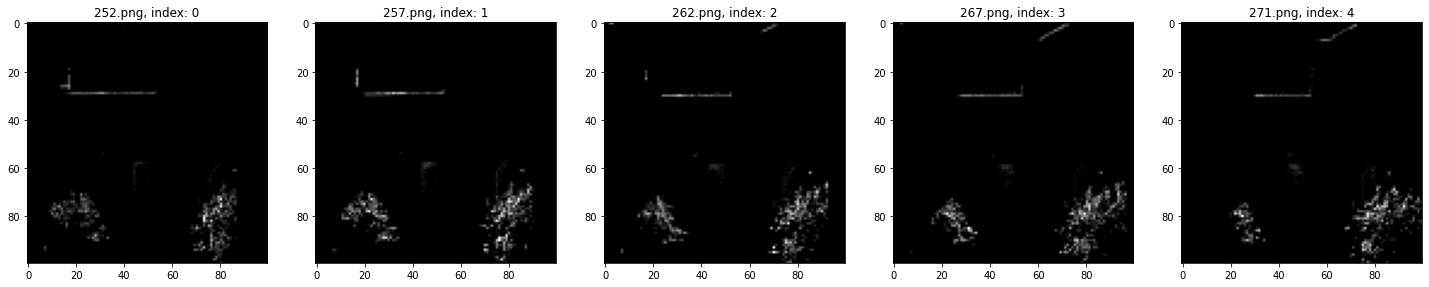

In [7]:
# visualize mode returns lidar stack
# and the corresponding file names
lidar_stack = sample[0][0]
lidar_fnames = sample[0][1]

cprint(f'index: {idx}, total offset: 50', color='green', attrs=['bold'])
utils.visualize_lidar_stack(lidar_stack=lidar_stack, file_names=lidar_fnames)

## Visualize Joystick Data

In table format

In [8]:
import numpy as np

joystick = sample[1]
print('joystick dtype: ', joystick.dtype)
print('joystick shape: ', joystick.shape)

joy_df = pd.DataFrame(data=joystick,
                      columns=['linear_x', 'linear_y', 'angular_z'])
joy_df

joystick dtype:  float32
joystick shape:  (300, 3)


,linear_x,linear_y,angular_z
0,1.6,0.051553,-0.0
1,1.6,0.051553,-0.0
2,1.6,0.051553,-0.0
3,1.6,0.051553,-0.0
4,1.6,0.051553,-0.0
...,...,...,...
295,1.6,0.001029,-0.0
296,1.6,0.001029,-0.0
297,1.6,0.001029,-0.0
298,1.6,0.000000,-0.0


## Goal Information
(x, y) location relative to the current position of the robot

In [9]:
goal = sample[2]
print(f'x: {goal[0]:.2f}, y: {goal[1]:.2f}')

x: 9.95, y: -0.73


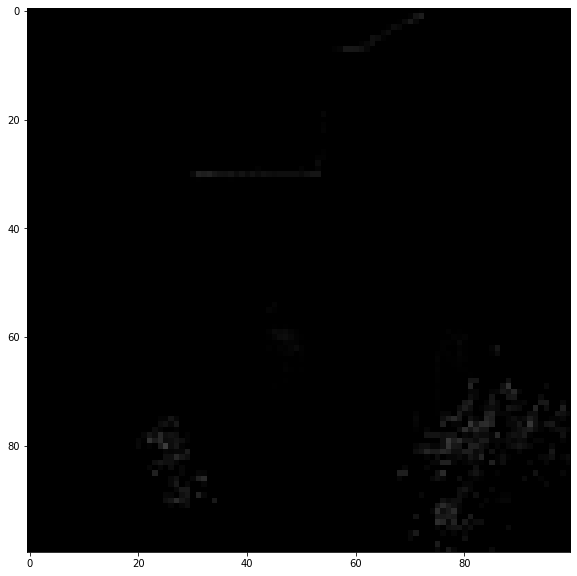

In [10]:
import numpy as np

data = pickle.load(open('../data/2021-11-15-15-06-15_final.pkl', 'rb'), encoding='latin1')
lidar_frame_w_goal = utils.visualize_goal(lidar_frame=lidar_stack[-1], goal=goal)
plt.figure(figsize=(10, 10))
plt.imshow(lidar_frame_w_goal);